# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


In [3]:
cities

['edinburgh of the seven seas',
 'port-aux-francais',
 'touba',
 'margaret river',
 'sisimiut',
 'punta arenas',
 'labuan bajo',
 'simpang',
 'kodiak',
 'guerrero negro',
 'puerto natales',
 'west island',
 'bethel',
 'saipan',
 'mount pearl',
 'gadzhiyevo',
 'thompson',
 'ilulissat',
 'mugia',
 'port macquarie',
 'geraldton',
 'mana',
 'east london',
 'colonia',
 'hamilton',
 'dudinka',
 'waitangi',
 'guane',
 'lamu',
 'hermanus',
 'harper',
 'puerto ayora',
 'luderitz',
 'nikolayevsk-on-amure',
 'yangambi',
 'lorengau',
 'praia da vitoria',
 'grytviken',
 'taiohae',
 'fale old settlement',
 'papatowai',
 'westport',
 'prince george',
 'bredasdorp',
 'conway',
 'isafjordur',
 'stanley',
 'qamdo',
 'archangelos',
 'narra',
 'argo',
 'cabo san lucas',
 'saint-philippe',
 'tateyama',
 'longyearbyen',
 'blackmans bay',
 'sao paulo de olivenca',
 'ancud',
 'carnarvon',
 'mili',
 'conceicao da barra',
 'constantia',
 'whitehorse',
 'abeche',
 'tan-tan',
 'revda',
 'colesberg',
 'bilibino',


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_response = requests.get(city_url)
        city_weather = city_weather_response.json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp - 273.15,   #Convert from Kelvin to Celsius
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | touba
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | sisimiut
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | labuan bajo
Processing Record 8 of Set 1 | simpang
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | guerrero negro
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | saipan
Processing Record 15 of Set 1 | mount pearl
Processing Record 16 of Set 1 | gadzhiyevo
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | mugia
Processing Record 20 of Set 1 | port macquarie
Processing Record 21 of Set 1 | geraldton
Processing Record 22 of Set 1 | 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,11.42,72,20,14.52,SH,1724983298
1,port-aux-francais,-49.3500,70.2167,3.27,70,99,11.76,TF,1724983289
2,touba,8.2833,-7.6833,21.01,98,100,3.15,CI,1724983300
3,margaret river,-33.9500,115.0667,13.87,64,17,9.16,AU,1724983302
4,sisimiut,66.9395,-53.6735,5.29,78,100,1.34,GL,1724983303


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,11.42,72,20,14.52,SH,1724983298
1,port-aux-francais,-49.3500,70.2167,3.27,70,99,11.76,TF,1724983289
2,touba,8.2833,-7.6833,21.01,98,100,3.15,CI,1724983300
3,margaret river,-33.9500,115.0667,13.87,64,17,9.16,AU,1724983302
4,sisimiut,66.9395,-53.6735,5.29,78,100,1.34,GL,1724983303


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

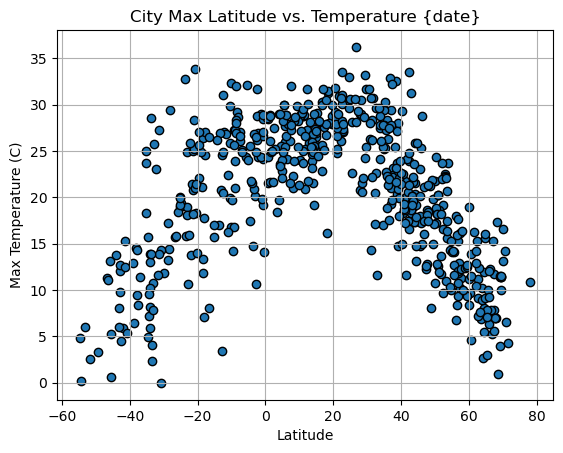

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature {date}")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

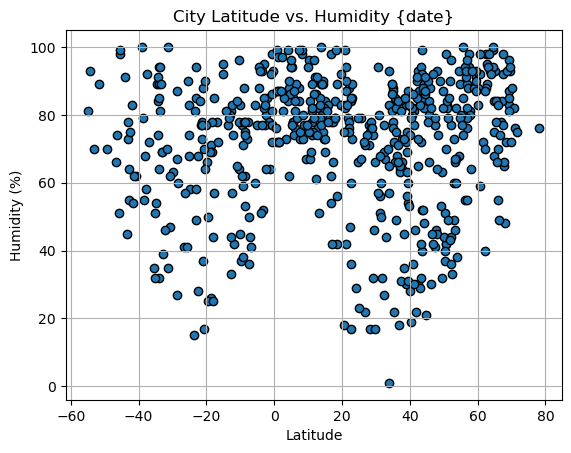

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

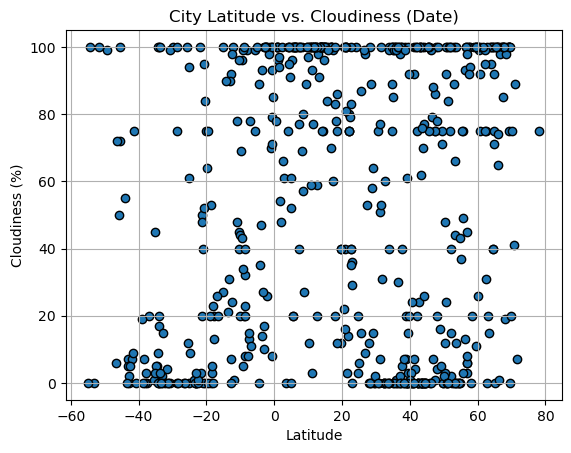

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor = "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

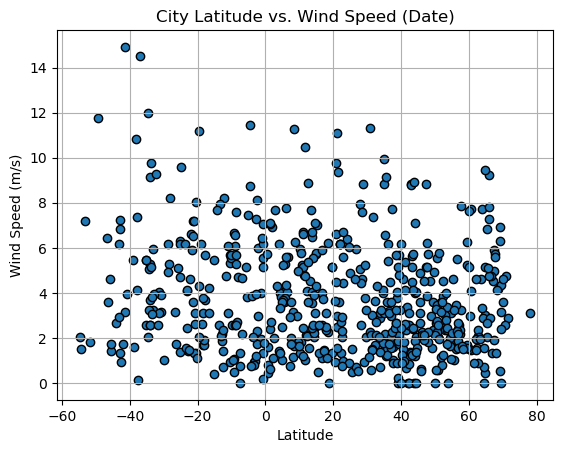

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,touba,8.2833,-7.6833,21.01,98,100,3.15,CI,1724983300
4,sisimiut,66.9395,-53.6735,5.29,78,100,1.34,GL,1724983303
8,kodiak,57.7900,-152.4072,11.30,81,100,3.23,US,1724983307
9,guerrero negro,27.9769,-114.0611,20.74,77,0,7.93,MX,1724983308
12,bethel,41.3712,-73.4140,20.08,82,100,2.37,US,1724983037


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,11.42,72,20,14.52,SH,1724983298
1,port-aux-francais,-49.3500,70.2167,3.27,70,99,11.76,TF,1724983289
3,margaret river,-33.9500,115.0667,13.87,64,17,9.16,AU,1724983302
5,punta arenas,-53.1500,-70.9167,6.06,70,0,7.20,CL,1724983113
6,labuan bajo,-8.4964,119.8877,29.15,62,8,2.69,ID,1724983305


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.5978994066426161


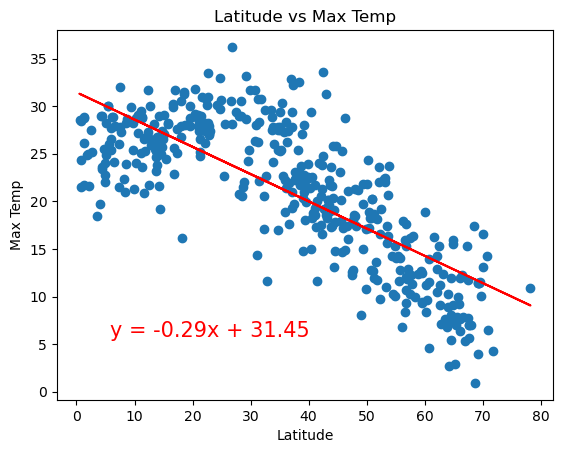

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,5.8),fontsize=15,color="red")
plt.title("Latitude vs Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r^2-value is: {rvalue**2}")
plt.show()



The r^2-value is: 0.46959104448930605


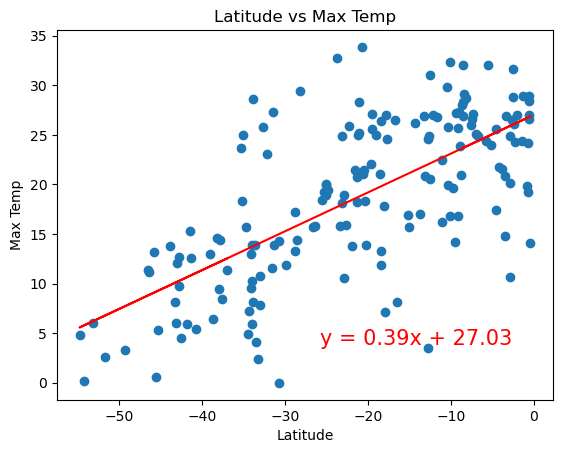

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25.8,3.8),fontsize=15,color="red")
plt.title("Latitude vs Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** As latitude approaches 0, maximum temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0015203411309543278


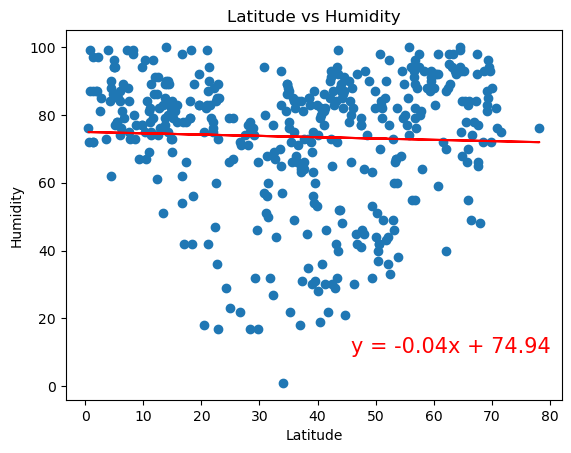

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45.8,9.8),fontsize=15,color="red")
plt.title("Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.0020235231917478777


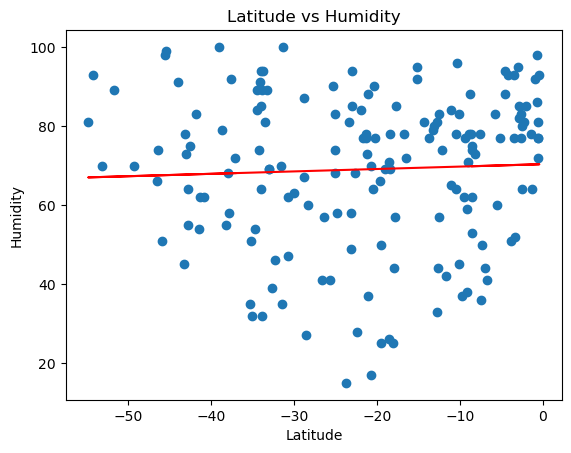

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-52.8,4.8),fontsize=15,color="red")
plt.title("Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Because the curve is relatively flat, latitude doesn't have much affect on humiditiy.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.023352507110036662


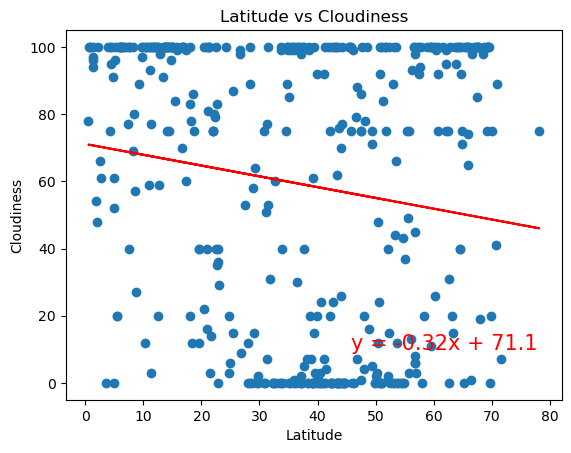

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45.8,9.8),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.09280049456883362


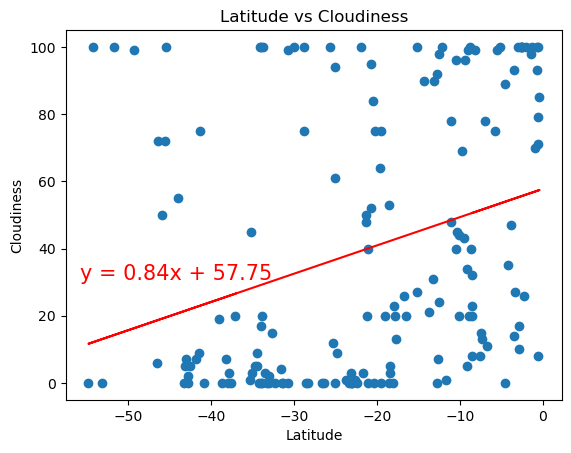

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55.8,30.8),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The linear relashinship does not model the data very well because the r^2 values are 0.02 and 0.09.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.00976973222630202


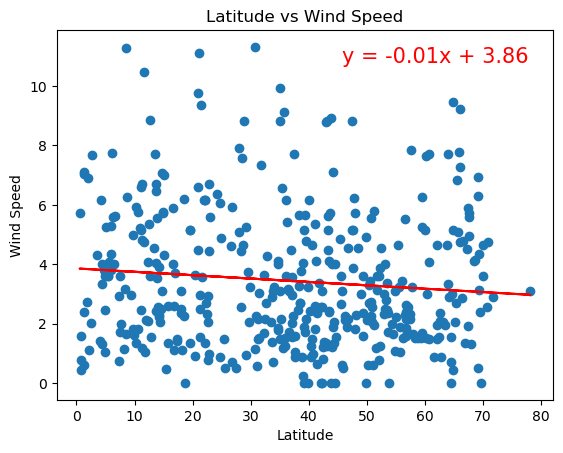

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45.8,10.8),fontsize=15,color="red")
plt.title("Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.017208796787675434


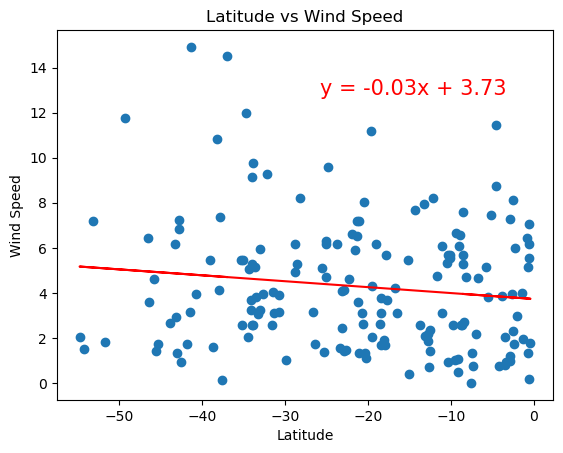

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25.8,12.8),fontsize=15,color="red")
plt.title("Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#The linear relashinship does not model the data very well because the r^2 values are 0.01 and 0.02.